<a href="https://colab.research.google.com/github/joaovictordds/Segmentacao_de_clientes/blob/main/notebook_segmentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Segmentação de cliente

**O Desafio**

Você faz parte do time de cientistas de dados da empresa All In One Place, que precisa determinar quem são os clientes elegíveis para participar da campanha *Insiders*.

Em posse dessa lista, o time de Marketing fará uma sequência de ações personalizadas e exclusivas ao grupo, de modo a aumentar o faturamento e a frequência de compra.

Como resultado para esse projeto, é esperado que você entregue uma lista de pessoas elegíveis a participar do programa Insiders, junto com um relatório respondendo às seguintes perguntas:

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?

O conjunto de dados inclui as seguintes informações:

- Invoice Number: identificador único de cada transação.
- Stock Code Product: código do item.
- Description Product: nome do item
- Quantity: A quantidade de cada item comprado por transação.
- Invoice Date: O dia em que a transação ocorreu
- Unit Price: Preço do produto por unidade
- Customer ID: identificador único do cliente
- Country: O nome do país que o cliente reside

Roteiro Sugerido para a Solução:

- Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.
- Levante Hipóteses sobre as características de um cliente Insider. Valide ou refute essas hipóteses através dos dados.
- Prepare os Dados para que os Algoritmos Estatísticos ou de Machine Learning sejam capazes de aprender a tarefa.
- Escreva vários algoritmos de Agrupamento ou clusterização.
- Contabilize a Performance do Modelo de Machine Learning e transforme em Performance de Negócio.
- Desenvolva uma API que retorne um “Score de Cluster” para cada cliente, indicando à qual cluster ele pertence.
- Crie um README sobre como interpretar e usar a sua solução.
- Escreva um Relatório, respondendo às perguntas de negócio.

### Limpeza & Preparação dos dados
- Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.

In [1]:
#Importação das 1ªs bibliotecas e acesso aos dados
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

dados = pd.read_csv('Ecommerce.csv', encoding='ISO-8859-1', parse_dates=['InvoiceDate'])
dados.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,NaN


In [2]:
#Renomeando colunas
nomes = ['IdVenda', 'CodItem', 'ITEM', 'QTDE', 'DataVenda', 'PrecoUnit', 'CLIENTE', 'País', 'desc',]         
dados.columns = nomes
dados.head(3)

,IdVenda,CodItem,ITEM,QTDE,DataVenda,PrecoUnit,CLIENTE,País,desc
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,NaN


In [3]:
#Eliminando a coluna desnecessária
dados.drop(columns='desc', inplace=True)

In [4]:
#Desmenbrando a variável data
dados['Ano'] = dados['DataVenda'].dt.year
dados['Mes'] = dados['DataVenda'].dt.month
dados['Dia'] = dados['DataVenda'].dt.day
dados.head(3)

,IdVenda,CodItem,ITEM,QTDE,DataVenda,PrecoUnit,CLIENTE,País,Ano,Mes,Dia
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29


In [5]:
#Criando a variável Total Vendido
dados['TotalVenda'] = dados['QTDE'] * dados['PrecoUnit']
dados.head(3)

,IdVenda,CodItem,ITEM,QTDE,DataVenda,PrecoUnit,CLIENTE,País,Ano,Mes,Dia,TotalVenda
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00


In [6]:
dados.shape

(541909, 12)

In [7]:
#Verificando dados nulos
dados.isnull().sum()

IdVenda            0
CodItem            0
ITEM            1454
QTDE               0
DataVenda          0
PrecoUnit          0
CLIENTE       135080
País               0
Ano                0
Mes                0
Dia                0
TotalVenda         0
dtype: int64

In [8]:
# Eliminando linhas dos dados inválidos
dados.dropna(axis = 0, inplace = True)
dados.shape

(406829, 12)

In [9]:
# Linhas com erro na venda
sem_vendas = dados[dados['TotalVenda'] <=0]#.index
sem_vendas.shape

(8945, 12)

In [10]:
# Elimando essas linhas
sem_vendas = dados[dados['TotalVenda'] <=0].index
dados.drop(sem_vendas, inplace = True)

In [11]:
# Linhas com erro na quantidade - eliminando
erro_qt = dados[dados['QTDE'] <= 0].index
dados.drop(erro_qt, inplace=True )
dados.shape

(397884, 12)

**Verificando outliers das variáveis numéricas**

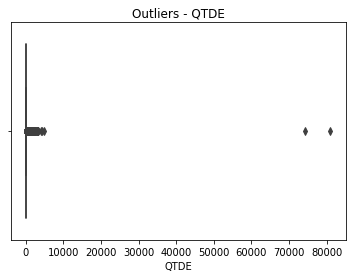

In [12]:
import seaborn as sns
sns.boxplot(dados['QTDE']).set_title('Outliers - QTDE');

In [13]:
dados[dados['QTDE'] > 2000]

,IdVenda,CodItem,ITEM,QTDE,DataVenda,PrecoUnit,CLIENTE,País,Ano,Mes,Dia,TotalVenda
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2016-11-30,0.18,16754.0,United Kingdom,2016,11,30,518.40
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2016-12-14,0.94,16029.0,United Kingdom,2016,12,14,2256.00
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2017-01-09,2.10,15749.0,United Kingdom,2017,1,9,6539.40
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2017-01-16,1.04,12346.0,United Kingdom,2017,1,16,77183.60
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2017-02-01,0.21,16333.0,United Kingdom,2017,2,1,544.32
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2017-02-09,0.94,16029.0,United Kingdom,2017,2,9,2256.00
91772,544152,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400,2017-02-14,0.06,14609.0,United Kingdom,2017,2,14,144.00
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2017-02-20,0.82,18087.0,United Kingdom,2017,2,20,3202.92
125282,547037,21967,PACK OF 12 SKULL TISSUES,2160,2017-03-18,0.25,14101.0,United Kingdom,2017,3,18,540.00
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2017-04-16,2.10,15749.0,United Kingdom,2017,4,16,6539.40


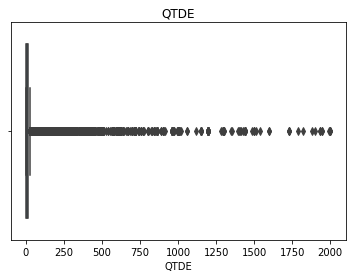

In [14]:
# Eliminando os valores discrepantes
outliers = dados[(dados['QTDE'] > 2000)].index
dados.drop(outliers, inplace = True)
sns.boxplot(dados['QTDE']).set_title('QTDE');

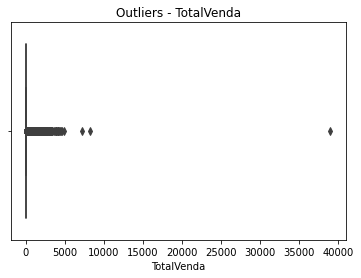

In [15]:
sns.boxplot(dados['TotalVenda']).set_title('Outliers - TotalVenda');

In [16]:
dados[dados['TotalVenda'] > 4000]

,IdVenda,CodItem,ITEM,QTDE,DataVenda,PrecoUnit,CLIENTE,País,Ano,Mes,Dia,TotalVenda
52134,540689,22470,HEART OF WICKER LARGE,1284,2017-01-09,3.21,17450.0,United Kingdom,2017,1,9,4121.64
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2017-01-09,2.55,15749.0,United Kingdom,2017,1,9,4921.50
52772,540818,48185,DOORMAT FAIRY CAKE,670,2017-01-09,6.75,15749.0,United Kingdom,2017,1,9,4522.50
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2017-04-16,2.40,15749.0,United Kingdom,2017,4,16,4632.00
160544,550461,48185,DOORMAT FAIRY CAKE,670,2017-04-16,6.35,15749.0,United Kingdom,2017,4,16,4254.50
173382,551697,POST,POSTAGE,1,2017-05-01,8142.75,16029.0,United Kingdom,2017,5,1,8142.75
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2017-06-08,649.50,15098.0,United Kingdom,2017,6,8,38970.00
244419,558526,23173,REGENCY TEAPOT ROSES,540,2017-06-28,8.15,17949.0,United Kingdom,2017,6,28,4401.00
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2017-09-18,5.06,17450.0,United Kingdom,2017,9,18,7144.72
422351,573077,M,Manual,1,2017-10-25,4161.06,12536.0,France,2017,10,25,4161.06


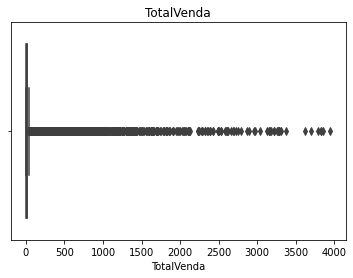

In [17]:
# Eliminando os valores discrepantes
outliers = dados[(dados['TotalVenda'] > 4000)].index
dados.drop(outliers, inplace = True)
sns.boxplot(dados['TotalVenda']).set_title('TotalVenda');

In [18]:
# Transformando variáveis objeto em categoricas para reduzir o uso da memória
categoricas = ['IdVenda', 'CodItem', 'ITEM', 'País']
for c in categoricas:
    dados[c] = dados[c].astype('category')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397853 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   IdVenda     397853 non-null  category      
 1   CodItem     397853 non-null  category      
 2   ITEM        397853 non-null  category      
 3   QTDE        397853 non-null  int64         
 4   DataVenda   397853 non-null  datetime64[ns]
 5   PrecoUnit   397853 non-null  float64       
 6   CLIENTE     397853 non-null  float64       
 7   País        397853 non-null  category      
 8   Ano         397853 non-null  int64         
 9   Mes         397853 non-null  int64         
 10  Dia         397853 non-null  int64         
 11  TotalVenda  397853 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 31.1 MB


In [19]:
dados.describe()

,QTDE,PrecoUnit,CLIENTE,Ano,Mes,Dia,TotalVenda
count,397853.000000,397853.000000,397853.00000,397853.000000,397853.000000,397853.000000,397853.000000
mean,12.446132,3.073580,15294.43172,2016.934260,7.547929,15.004766,21.445978
std,37.477737,15.292622,1713.14352,0.247828,3.407192,8.796117,65.626095
min,1.000000,0.001000,12347.00000,2016.000000,1.000000,1.000000,0.001000
25%,2.000000,1.250000,13969.00000,2017.000000,5.000000,7.000000,4.680000
50%,6.000000,1.950000,15159.00000,2017.000000,8.000000,15.000000,11.800000
75%,12.000000,3.750000,16795.00000,2017.000000,11.000000,22.000000,19.800000
max,2000.000000,3949.320000,18287.00000,2017.000000,12.000000,31.000000,3949.320000


In [20]:
# Dados Finalizados para uso
dados.head(5)

,IdVenda,CodItem,ITEM,QTDE,DataVenda,PrecoUnit,CLIENTE,País,Ano,Mes,Dia,TotalVenda
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34


### Exploração dos Dados
* Levante Hipóteses sobre as características de um cliente Insider. Valide ou refute essas hipóteses através dos dados.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sweetviz as sv
eda = sv.analyze(dados)
eda.show_html()

In [ ]:
dados['Ano'].value_counts()

2017    371698
2016     26155
Name: Ano, dtype: int64

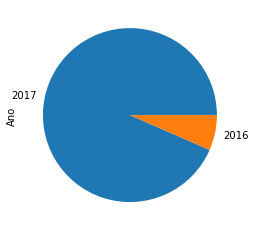

In [ ]:
dados['Ano'].value_counts().plot(kind='pie');

In [ ]:
# Separando vendas por ano
vendas_16 = dados[dados['Ano'] == 2016]
vendas_17 = dados[dados['Ano'] == 2017]

In [ ]:
vendas_16.describe()

,QTDE,PrecoUnit,CLIENTE,Ano,Mes,Dia,TotalVenda
count,26155.000000,26155.000000,26155.000000,26155.0,26155.000000,26155.000000,26155.000000
mean,11.737144,3.132651,15529.116880,2016.0,11.849321,12.032040,21.790843
std,39.726228,5.220632,1740.384018,0.0,0.357742,8.745956,75.327363
min,1.000000,0.070000,12347.000000,2016.0,11.000000,1.000000,0.140000
25%,2.000000,1.250000,14161.000000,2016.0,12.000000,5.000000,4.200000
50%,4.000000,2.100000,15570.000000,2016.0,12.000000,10.000000,10.500000
75%,12.000000,3.750000,17179.000000,2016.0,12.000000,15.000000,19.800000
max,1824.000000,295.000000,18269.000000,2016.0,12.000000,30.000000,3828.000000


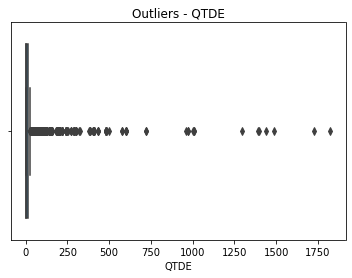

In [ ]:
sns.boxplot(vendas_16['QTDE']).set_title('Outliers - QTDE');

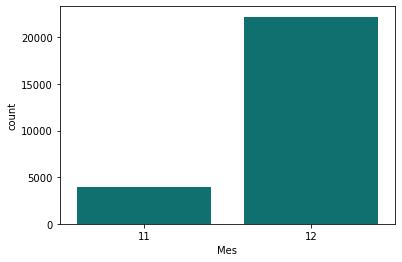

In [ ]:
# Vendas por mês em 2016
sns.countplot(vendas_16['Mes'], color='teal');

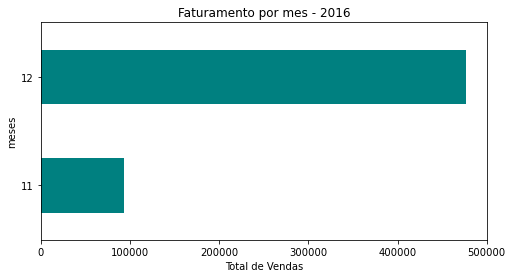

In [ ]:
fat_16 = vendas_16.groupby('Mes')['TotalVenda'].sum()
plt.figure(figsize=(8,4))
fat_16.sort_index().plot(kind='barh', color='teal')
plt.title('Faturamento por mes - 2016')
plt.xlabel('Total de Vendas')
plt.ylabel('meses')
plt.show()

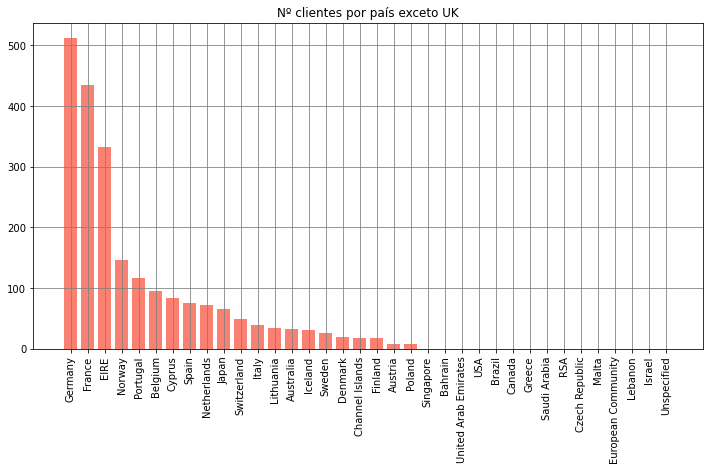

In [ ]:
#Tirando o primeiro país do gráfico
paises = vendas_16['País'].value_counts()[1:]
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(paises.index, paises, color = 'salmon')
ax.set_xticklabels(paises.index, rotation = 90)
ax.set_title('Nº clientes por país exceto UK - 2016')
ax.grid(color='gray')
plt.show();

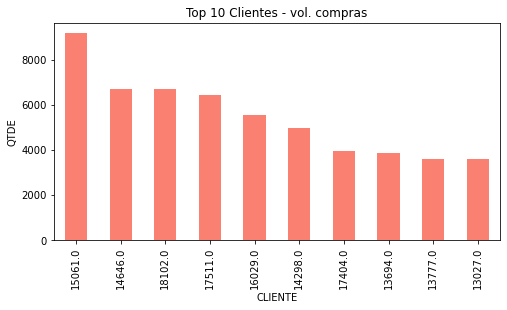

In [ ]:
top_10_clientes = vendas_16.groupby('CLIENTE')['QTDE'].sum()
top_customers = top_10_clientes.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes 2016 - vol. compras')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.show()

In [ ]:
vendas_17.describe()

,QTDE,PrecoUnit,CLIENTE,Ano,Mes,Dia,TotalVenda
count,371698.000000,371698.000000,371698.000000,371698.0,371698.000000,371698.000000,371698.000000
mean,12.496021,3.069423,15277.917802,2017.0,7.245256,15.213945,21.421711
std,37.313966,15.760788,1710.000232,0.0,3.320136,8.761747,64.888902
min,1.000000,0.001000,12347.000000,2017.0,1.000000,1.000000,0.001000
25%,2.000000,1.250000,13941.000000,2017.0,5.000000,7.000000,4.950000
50%,6.000000,1.850000,15127.000000,2017.0,8.000000,15.000000,11.900000
75%,12.000000,3.750000,16775.000000,2017.0,10.000000,23.000000,19.800000
max,2000.000000,3949.320000,18287.000000,2017.0,12.000000,31.000000,3949.320000


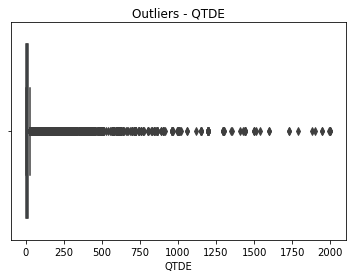

In [ ]:
sns.boxplot(vendas_17['QTDE']).set_title('Outliers - QTDE');

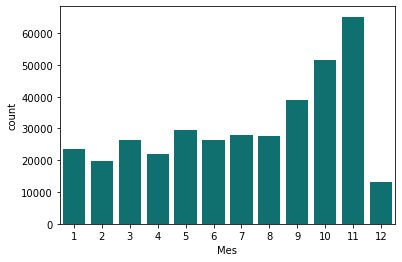

In [ ]:
# Vendas por mês em 2017
sns.countplot(vendas_17['Mes'], color='teal');

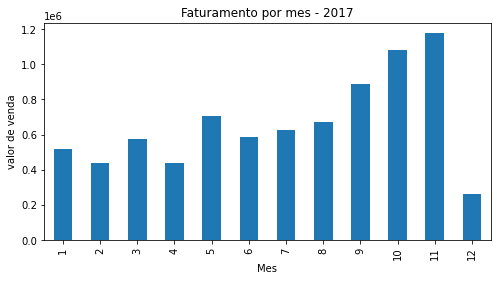

In [ ]:
fat_17 = vendas_17.groupby('Mes')['TotalVenda'].sum()
plt.figure(figsize=(8,4))
fat_17.sort_index().plot(kind='bar')
plt.title('Faturamento por mes - 2017')
plt.xlabel('Mes')
plt.ylabel('valor de venda')
plt.show()

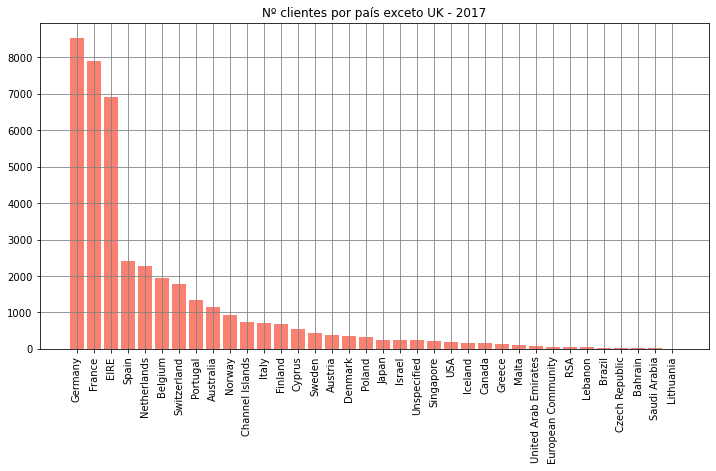

In [ ]:
#Tirando o primeiro país do gráfico
paises = vendas_17['País'].value_counts()[1:]
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(paises.index, paises, color = 'salmon')
ax.set_xticklabels(paises.index, rotation = 90)
ax.set_title('Nº clientes por país exceto UK - 2017')
ax.grid(color='gray')
plt.show();

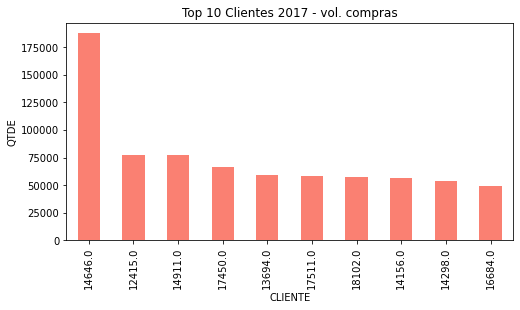

In [ ]:
top_10_clientes = vendas_17.groupby('CLIENTE')['QTDE'].sum()
top_customers = top_10_clientes.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes 2017 - vol. compras')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')
plt.show()

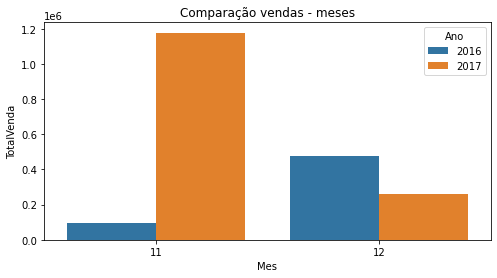

In [ ]:
comparacao_mensal = dados[(dados['Mes'] == 11) | (dados['Mes'] == 12)]
compar = comparacao_mensal.groupby(['Ano', 'Mes'])['TotalVenda'].sum()
compar = comparison.reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=compar, x='Mes', y='TotalVenda', hue='Ano')
plt.title('Comparação vendas - meses')
plt.show()

In [ ]:
dados.columns

Index(['IdVenda', 'CodItem', 'ITEM', 'QTDE', 'DataVenda', 'PrecoUnit',
       'CLIENTE', 'País', 'Ano', 'Mes', 'Dia', 'TotalVenda'],
      dtype='object')

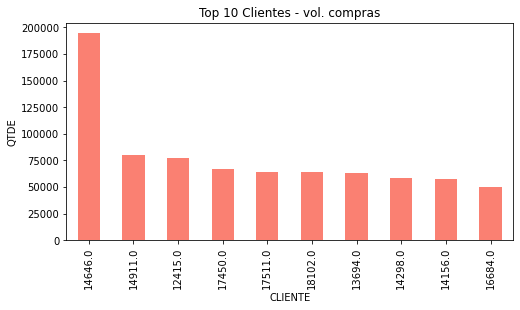

In [ ]:
top_10_clientes = dados.groupby('CLIENTE')['QTDE'].sum()
top_customers = top_10_clientes.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 Clientes - vol. compras')
plt.xlabel('CLIENTE')
plt.ylabel('QTDE')

plt.show()

In [ ]:
# QTDE de clientes por país
dados['País'].value_counts().head(10)

United Kingdom    354294
Germany             9040
France              8339
EIRE                7236
Spain               2484
Netherlands         2358
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: País, dtype: int64

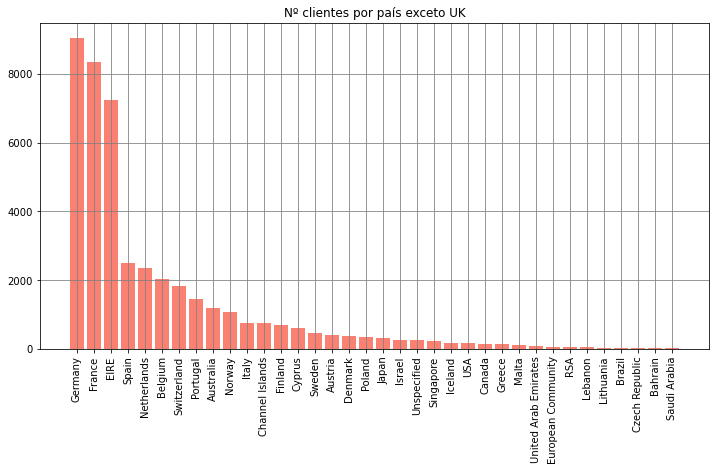

In [ ]:
#Tirando o primeiro país do gráfico
paises = dados['País'].value_counts()[1:]
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(paises.index, paises, color = 'salmon')
ax.set_xticklabels(paises.index, rotation = 90)
ax.set_title('Nº clientes por país exceto UK')
ax.grid(color='gray')
plt.show();

### Modelo de Clusterização

In [ ]:
# Importando bilbiotecas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [ ]:
# Criando um dataset agrupando as vendas por cliente e algumas estatisticas
var = dados.groupby('CLIENTE').agg({'TotalVenda': ['mean','sum','max']})
clientes = pd.DataFrame(var)
clientes.columns = ['Mean', 'Sum','Max']
clientes.head(6)

,Mean,Sum,Max
CLIENTE,,,
12347.0,23.681319,4310.00,249.6
12348.0,57.975484,1797.24,240.0
12349.0,24.076027,1757.55,300.0
12350.0,19.670588,334.40,40.0
12352.0,29.482824,2506.04,376.5
12353.0,22.250000,89.00,39.8


In [ ]:
# Passando os dados dos clientes para o formato de matriz
matriz = var.values

In [ ]:
# Escalonando os dados
sc = StandardScaler()
matriz = sc.fit_transform(matriz)
matriz

array([[-0.08890016,  0.27970169,  0.52038526],
       [ 0.22663483, -0.02036699,  0.48288779],
       [-0.08526851, -0.02510669,  0.71724698],
       ...,
       [-0.17027068, -0.21372736, -0.35494632],
       [-0.28129252,  0.01517657, -0.37330445],
       [-0.06529506, -0.0155855 , -0.11472815]])

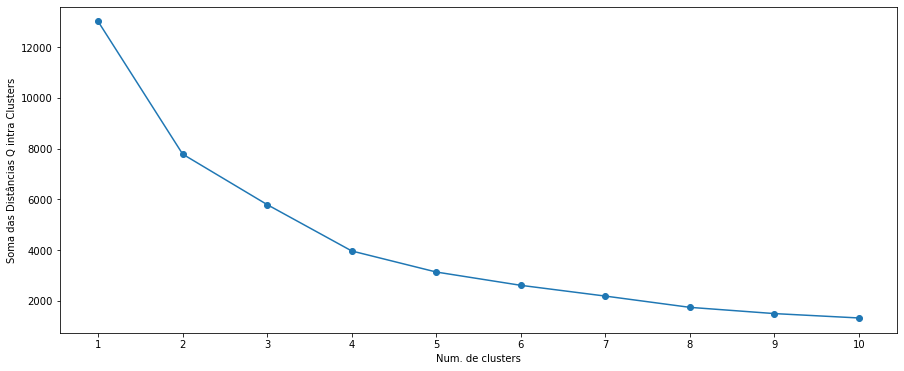

In [ ]:
# Escolhendo o numero de clusters pelo método Elbow utilizando K-Means

ks = range(1, 11)
inertia = [] # inertia: Soma das distâncias quadráticas intra cluster

for k in ks:
    # Criando um modelo KMeans com k clusters:
    model = KMeans(n_clusters= k)
    
    # Fitando os dados no modelo
    model.fit(matriz)
    
    # Adicionado os resultados da inertia na sua lista
    inertia.append(model.inertia_)
    
# Gráfico Elbow
plt.figure(figsize=(15,6))
plt.plot(ks, inertia, '-o')
plt.xlabel('Num. de clusters')
plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.xticks(ks)
plt.show()

In [ ]:
#Criando um modelo
modelo = KMeans(n_clusters=4)
modelo.fit(matriz)

KMeans(n_clusters=4)

In [ ]:
# Adicionando os clusters na tabela de clientes
clientes['Cluster'] = modelo.predict(matriz)
clientes.head()

,Mean,Sum,Max,Cluster
CLIENTE,,,,
12347.0,23.681319,4310.00,249.6,0
12348.0,57.975484,1797.24,240.0,0
12349.0,24.076027,1757.55,300.0,0
12350.0,19.670588,334.40,40.0,0
12352.0,29.482824,2506.04,376.5,0


In [ ]:
clientes.shape

(4336, 4)

In [ ]:
clientes['Cluster'] = clientes['Cluster'].map({0: 'bronze', 1: 'prata', 2: 'ouro', 3: 'platina'})

In [ ]:
clientes.groupby('Cluster').nunique()

,Mean,Sum,Max
Cluster,,,
bronze,4205,4184,763
ouro,4,4,4
platina,6,6,6
prata,90,90,83


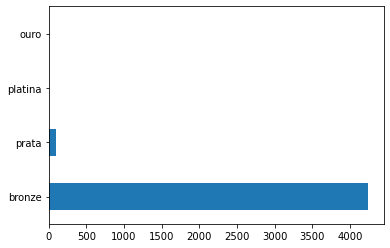

In [ ]:
# Grafico Pizza
clientes['Cluster'].value_counts().plot(kind='barh');

In [ ]:
clientes[clientes['Cluster'] == 'ouro']

,Mean,Sum,Max,Cluster
CLIENTE,,,,
15195.0,3861.00,3861.0,3861.0,ouro
15749.0,3281.25,13125.0,3700.0,ouro
16532.0,1687.20,6748.8,2232.0,ouro
17846.0,2033.10,2033.1,2033.1,ouro


In [ ]:
clientes[clientes['Cluster'] == 'platina']

,Mean,Sum,Max,Cluster
CLIENTE,,,,
12415.0,174.950322,124914.53,1718.40,platina
14156.0,83.842593,117379.63,2365.20,platina
14646.0,132.633263,275214.02,2577.60,platina
14911.0,25.343623,143825.06,1687.17,platina
17450.0,547.117701,183284.43,3825.36,platina
18102.0,602.453132,259657.30,3828.00,platina
